In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/pedalboard-plugin.csv', sep=",", index_col=['id', 'name'])
data.head(3)

plugin1  plugin2  plugin3  plugin4  plugin5  plugin6
id   name                                                            
9467 !!*Cuda'         23       27       73      109      106       61
7313 '70s*V.H**       39       30      100       60      107      107
     '90s*V.H**       23       99       31       42       53       60

In [3]:
print('Nones by position')
[data[data[f'plugin{i}'] == 107][f'plugin{i}'].count() for i in range(1, 7)]

Nones by position


[179, 78, 95, 254, 534, 886]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fed162a92e8>,
      dtype=object)

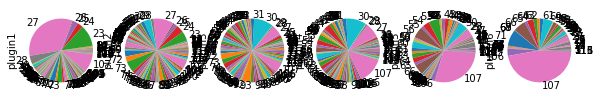

In [4]:
dataframe = pd.DataFrame(data={
    f'plugin{i}': data[f'plugin{i}'].value_counts()
    for i in range(1, 7)
}).fillna(0)

dataframe.plot.pie(subplots=True, legend=False, figsize=(10, 10))

### Total of plugins

In [5]:
plugins = [data[column] for column in data.columns]

plugins_use = pd.concat(plugins).value_counts()
plugins_use.name = 'total'
plugins_use.head()

107    2026
27     1184
30      581
23      338
71      316
Name: total, dtype: int64

In [6]:
plugins_categories = pd.read_csv('../data/plugins_categories_simplified.csv', sep=",", index_col=['id'])
plugins_categories.groupby('category').count()

name
category            
Amp               28
Combination Fx     7
Delay             12
Dynamics           7
Filter_EQ         10
Modulation        22
None               1
Pedal Fx           4
Reverb             8
SFX                3
Stomp             15

In [7]:
plugins_categories.join(plugins_use.to_frame()).head()

name  category   total
id                             
23       Comp  Dynamics   338.0
24   RackComp  Dynamics   185.0
25     M Comp  Dynamics    98.0
26  SlowATTCK  Dynamics    31.0
27        ZNR  Dynamics  1184.0

In [8]:
plugins_categories.join(plugins_use.to_frame()).groupby('category').sum()

total
category              
Amp             1479.0
Combination Fx   196.0
Delay           1003.0
Dynamics        2032.0
Filter_EQ        873.0
Modulation       963.0
None            2026.0
Pedal Fx         209.0
Reverb          1250.0
SFX               37.0
Stomp           1326.0